In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('reviews.csv')  
print(df.shape)
df.head()

(12495, 12)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [4]:
df = df[['content', 'score']]
df.isnull().sum()

content    0
score      0
dtype: int64

Text(0.5, 0, 'Review score')

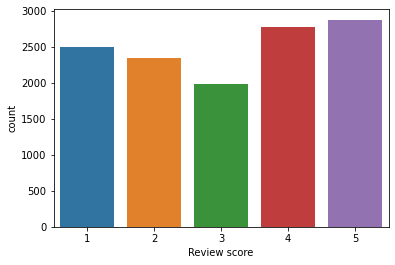

In [5]:
sns.countplot(x='score', data=df)
plt.xlabel('Review score')

[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

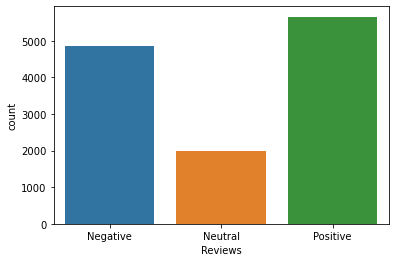

In [6]:
df["score"] = df["score"].map({1:0, 2:0, 3:1, 4:2, 5:2})
sentiments = ['Negative', 'Neutral', 'Positive']
ax = sns.countplot(x='score', data=df)
plt.xlabel('Reviews')
ax.set_xticklabels(sentiments)

In [7]:
def text_cleaning(Review):
    text = Review.lower()
    url_find = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    if url_find:
        text = re.sub("".join(url_find), " ", text)
    alpha_text = re.sub("[^a-z]+", " ", text)
    clean_text = re.sub(r"\s+", " ", alpha_text)
    return clean_text

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

sw = stopwords.words('english')
le = WordNetLemmatizer()

def text_processing(clean_text):
    tok_text = word_tokenize(clean_text)
    filter_text = [text for text in tok_text if text not in sw]
    lem_text =[le.lemmatize(text,pos='a') for text in filter_text]
    return " ".join(lem_text)

In [9]:
df.tail(10)

,content,score
12485,good,2
12486,excellent app.,2
12487,vb,2
12488,user friendly. nice.,2
12489,its ok But we can not undestad repeated task s...,2
12490,"I really like the planner, it helps me achieve...",2
12491,😁****😁,2
12492,Very useful apps. You must try it,2
12493,Would pay for this if there were even more add...,2
12494,Sooow good,2


In [10]:
df['content'] = df['content'].apply(lambda x:text_cleaning(x))
df['content'] = df['content'].apply(lambda x:text_processing(x))

df.tail(10)

,content,score
12485,good,2
12486,excellent app,2
12487,vb,2
12488,user friendly nice,2
12489,ok undestad repeated task shedule,2
12490,really like planner helps achieve tasks goals ...,2
12491,,2
12492,useful apps must try,2
12493,would pay even additions updates absolutely lo...,2
12494,sooow good,2


In [11]:
df.drop([x for x in df.index if len(df['content'][x])<2], inplace=True)
df.shape

(12379, 2)

In [12]:
text_list = []                            
for text in df.content:
    text_list.append(text)
text_list

['open app anymore',
 'begging refund app month nobody replying',
 'costly premium version approx indian rupees per year good download premium version app apkmos website use microsoft list app far good',
 'used keep organized updates made mess things cudn u leave well enuf alone guess ur techies feel need keep making changes justify continuing collect salary',
 'dan birthday oct',
 'changed viewed different lists jumbled together find need',
 'looking grocery list app every time tap away app tap opening see list find way keep certain list showing open reopen app eta response reply work like phone even grocery list showing open another app go back app list lists showing retap get grocery list show',
 'reset free trial new phone like see good',
 'stop monthly payment use app anymore',
 'complain crashes immediately fixed good job crashes returned really need fixed need change apps otherwise followed instructions deleting data etc crashed patient person used years let try one time find an

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 10000 
tf = TfidfVectorizer(max_features=max_features)

x = tf.fit_transform(text_list).toarray()
y = np.array(df['score']) 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 500)

lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)  

In [16]:
accuracy = 100.0 * accuracy_score(y_test, y_pred1)
print("Accuracy :", accuracy, "%")

Accuracy : 72.53634894991923 %


In [17]:
print(classification_report(y_test, y_pred1, target_names=sentiments))

              precision    recall  f1-score   support

    Negative       0.72      0.82      0.76       493
     Neutral       0.25      0.07      0.11       181
    Positive       0.77      0.86      0.81       564

    accuracy                           0.73      1238
   macro avg       0.58      0.58      0.56      1238
weighted avg       0.67      0.73      0.69      1238



Text(0.5, 51.0, 'Predicted')

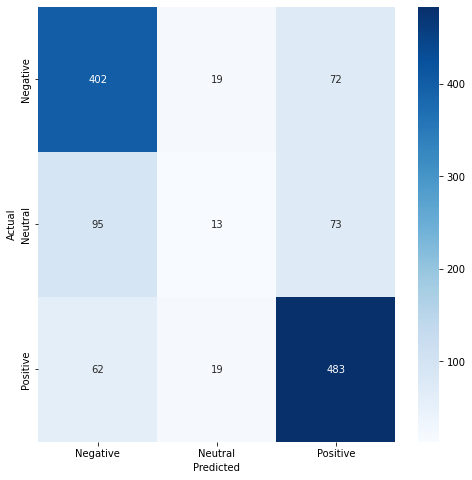

In [18]:
mat = confusion_matrix(y_test, y_pred1)      
plt.figure(figsize = (8, 8))
sns.heatmap(mat, annot = True, fmt="d", cmap="Blues", xticklabels=sentiments, yticklabels=sentiments)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [19]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()

gnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)

In [20]:
accuracy = 100.0 * accuracy_score(y_test, y_pred2)
print("Accuracy :", accuracy, "%") 

Accuracy : 72.94022617124394 %


In [21]:
print(classification_report(y_test, y_pred2, target_names=sentiments))

              precision    recall  f1-score   support

    Negative       0.72      0.81      0.76       493
     Neutral       0.00      0.00      0.00       181
    Positive       0.74      0.89      0.81       564

    accuracy                           0.73      1238
   macro avg       0.49      0.57      0.52      1238
weighted avg       0.62      0.73      0.67      1238



Text(0.5, 51.0, 'Predicted')

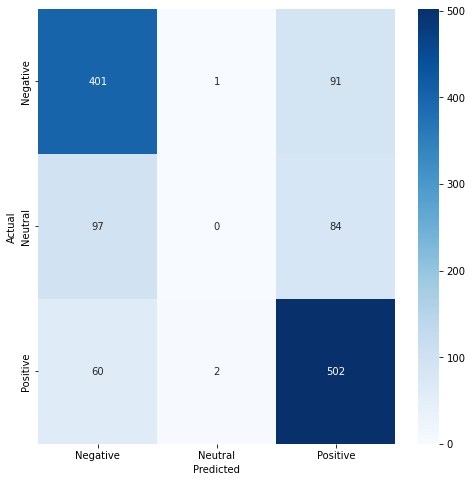

In [22]:
mat = confusion_matrix(y_test, y_pred2)      
plt.figure(figsize = (8, 8))
sns.heatmap(mat, annot = True, fmt="d", cmap="Blues", xticklabels=sentiments, yticklabels=sentiments)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(x_train,y_train)
y_pred3 = knn.predict(x_test)

In [24]:
accuracy = 100.0 * accuracy_score(y_test, y_pred3)
print("Accuracy :", accuracy, "%") 

Accuracy : 68.25525040387723 %


In [25]:
print(classification_report(y_test, y_pred3, target_names=sentiments))

              precision    recall  f1-score   support

    Negative       0.74      0.65      0.69       493
     Neutral       1.00      0.01      0.02       181
    Positive       0.65      0.93      0.77       564

    accuracy                           0.68      1238
   macro avg       0.80      0.53      0.49      1238
weighted avg       0.74      0.68      0.63      1238



Text(0.5, 51.0, 'Predicted')

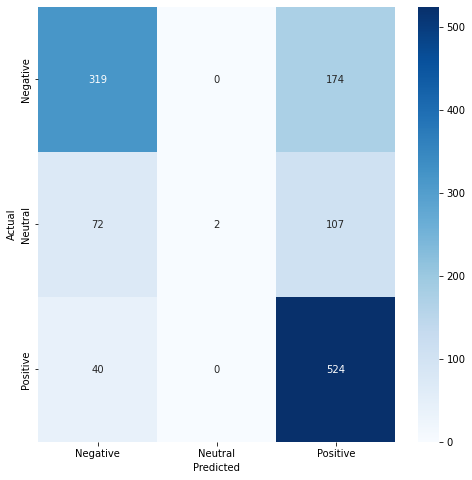

In [26]:
mat = confusion_matrix(y_test, y_pred3)      
plt.figure(figsize = (8, 8))
sns.heatmap(mat, annot = True, fmt="d", cmap="Blues", xticklabels=sentiments, yticklabels=sentiments)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42)

svm.fit(x_train,y_train)
y_pred4 = svm.predict(x_test)

In [71]:
accuracy = 100.0 * accuracy_score(y_test, y_pred4)
print("Accuracy :", accuracy, "%") 

Accuracy : 71.48626817447496 %


In [72]:
print(classification_report(y_test, y_pred4, target_names=sentiments))

              precision    recall  f1-score   support

    Negative       0.69      0.82      0.75       493
     Neutral       0.23      0.06      0.10       181
    Positive       0.77      0.84      0.80       564

    accuracy                           0.71      1238
   macro avg       0.57      0.57      0.55      1238
weighted avg       0.66      0.71      0.68      1238



Text(0.5, 51.0, 'Predicted')

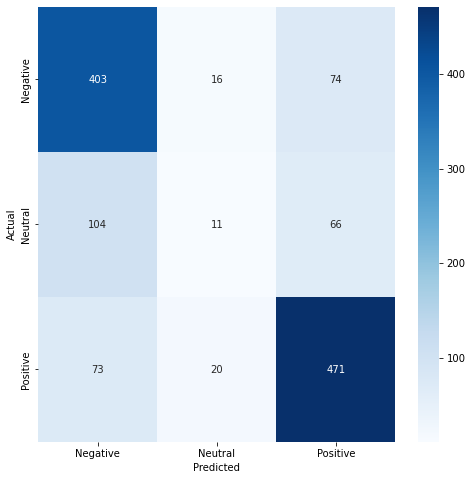

In [73]:
mat = confusion_matrix(y_test, y_pred4)      
plt.figure(figsize = (8, 8))
sns.heatmap(mat, annot = True, fmt="d", cmap="Blues", xticklabels=sentiments, yticklabels=sentiments)
plt.ylabel('Actual')
plt.xlabel('Predicted')